# Classification of Flower Species Usinh K Nearest Neighbour (KNN)

In [1]:
# Importing Required Library
import pandas as pd

In [2]:
data = pd.read_csv(r'Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# To Check for any Null Values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
# Object to Number Mapping
Y = data['Species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2 
})

In [8]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [9]:
X = data.drop(['Id', 'Species'], axis=1)

In [10]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
# Splitting of Data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.35)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)

In [13]:
# Training of Model
model.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [14]:
ypred = model.predict(xtest)
ypred

array([1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1, 0, 2, 0, 2, 1, 2,
       1, 2, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2, 1,
       2, 1, 2, 0, 1, 0, 2, 2, 1], dtype=int64)

In [15]:
# getting k Value
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)*100

94.33962264150944

# Name Prediction -> Checking

In [16]:
import numpy as np
name = np.array([['Iris-setosa'],
                 ['Iris-versicolor'],
                 ['Iris-virginica']])

In [17]:
name[model.predict([[3.2,2.1,8.9,6.8]])]

array([['Iris-virginica']], dtype='<U15')

In [18]:
name[model.predict([[2.1,3.2,3.3,2.1]])]

array([['Iris-versicolor']], dtype='<U15')

# Plots

In [19]:
X.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [20]:
# Saving each column in different columns
x1 = X['SepalLengthCm']
x2 = X['SepalWidthCm']
x3 = X['PetalLengthCm']
x4 = X['PetalWidthCm']

In [22]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [21]:
import matplotlib.pyplot as plt

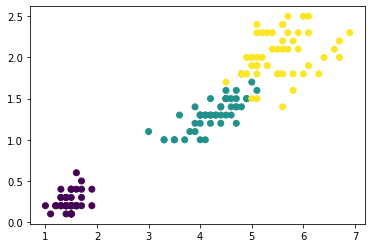

In [23]:
# Best Plot 0.8> x <1
plt.scatter(x3,x4, c= Y)
plt.show()

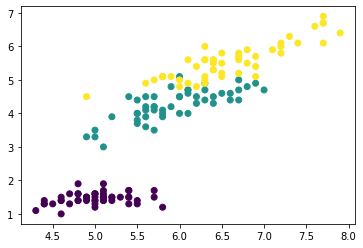

In [24]:
plt.scatter(x1,x3, c= Y)
plt.show()

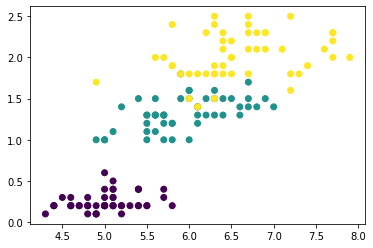

In [25]:
plt.scatter(x1,x4, c= Y) # Color Code from Y-> 0,1,2 -> 3 diff Color, Acceptable
plt.show()

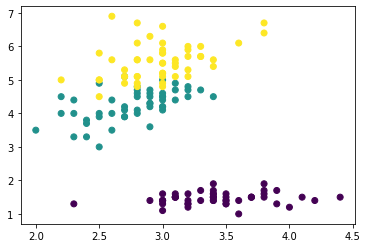

In [26]:
# Worst Correlation corr<0.8
plt.scatter(x2,x3, c= Y)
plt.show()

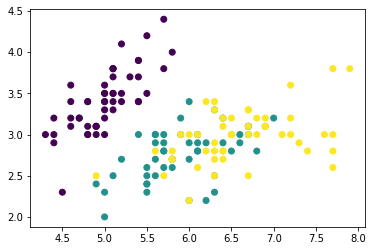

In [28]:
plt.scatter(x1,x2, c= Y)
plt.show()